In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
# loading the data
df=pd.read_csv("stroke_data.csv")
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [4]:
df.shape

(40910, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [7]:
pd.DataFrame(df.nunique()).T

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,111,2,2,2,5,2,2903,370,2,2


In [15]:
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [24]:
pd.DataFrame(df.columns,columns=["column names"]).T

,0,1,2,3,4,5,6,7,8,9,10
column names,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [25]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [27]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

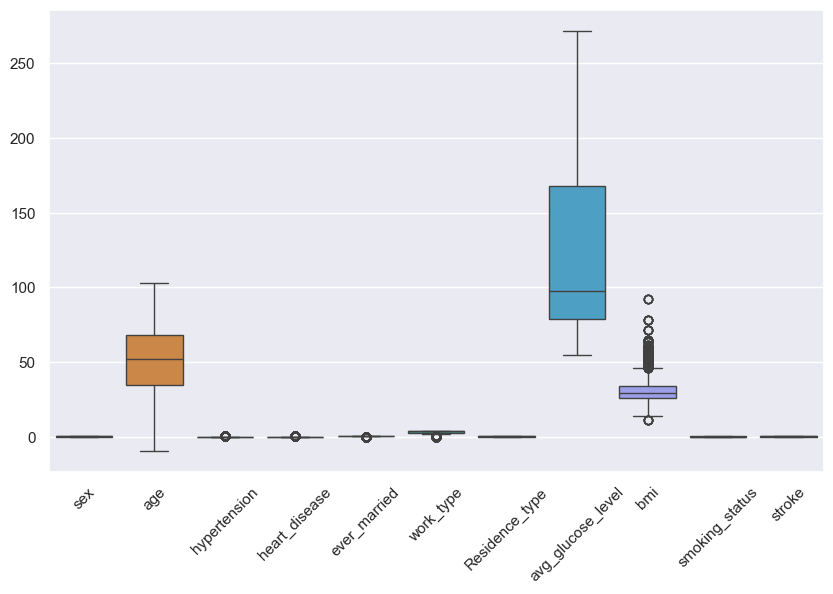

In [38]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.boxplot(df)

In [43]:
df=df.dropna()

<Axes: >

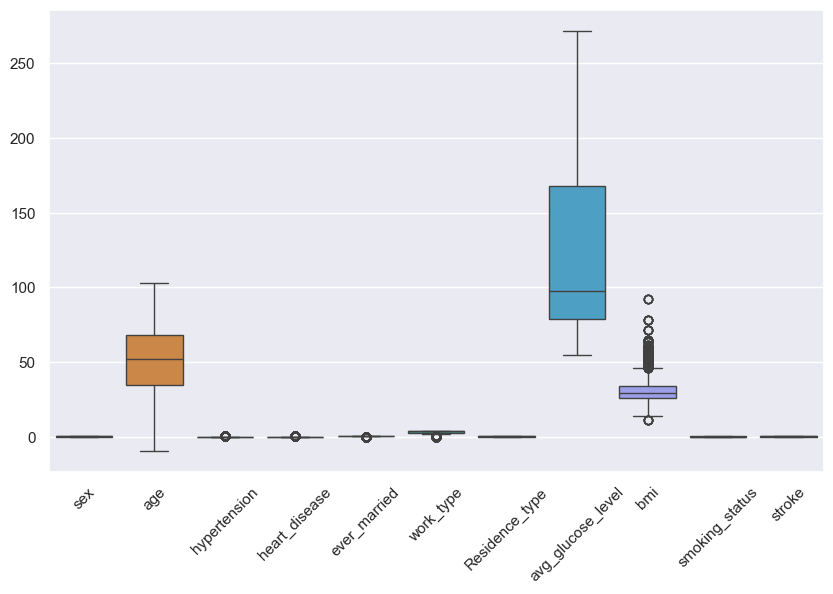

In [44]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.boxplot(df)

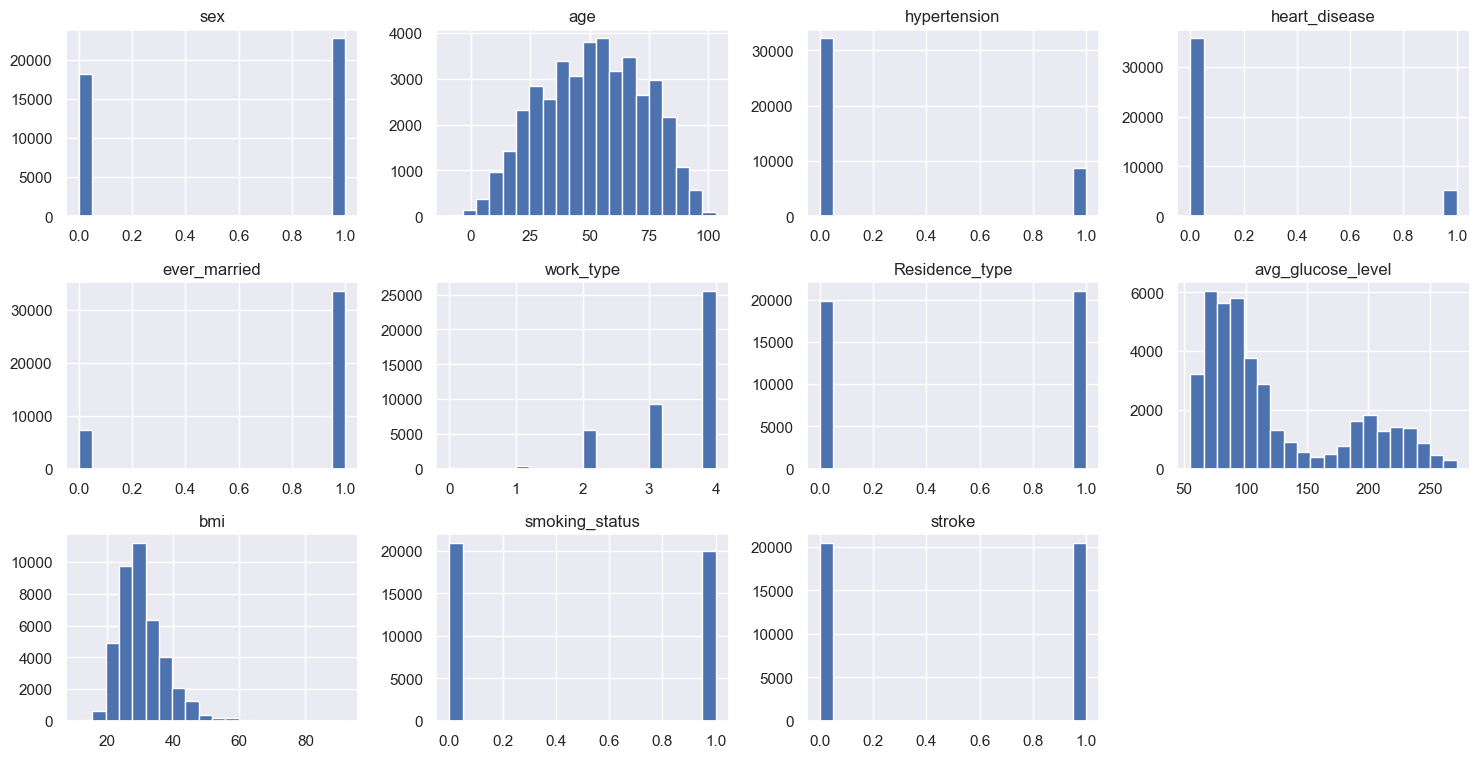

In [45]:
df.hist(bins=20, figsize=(15, 10), layout=(4, 4), sharex=False, sharey=False)

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
df.shape

(40907, 11)

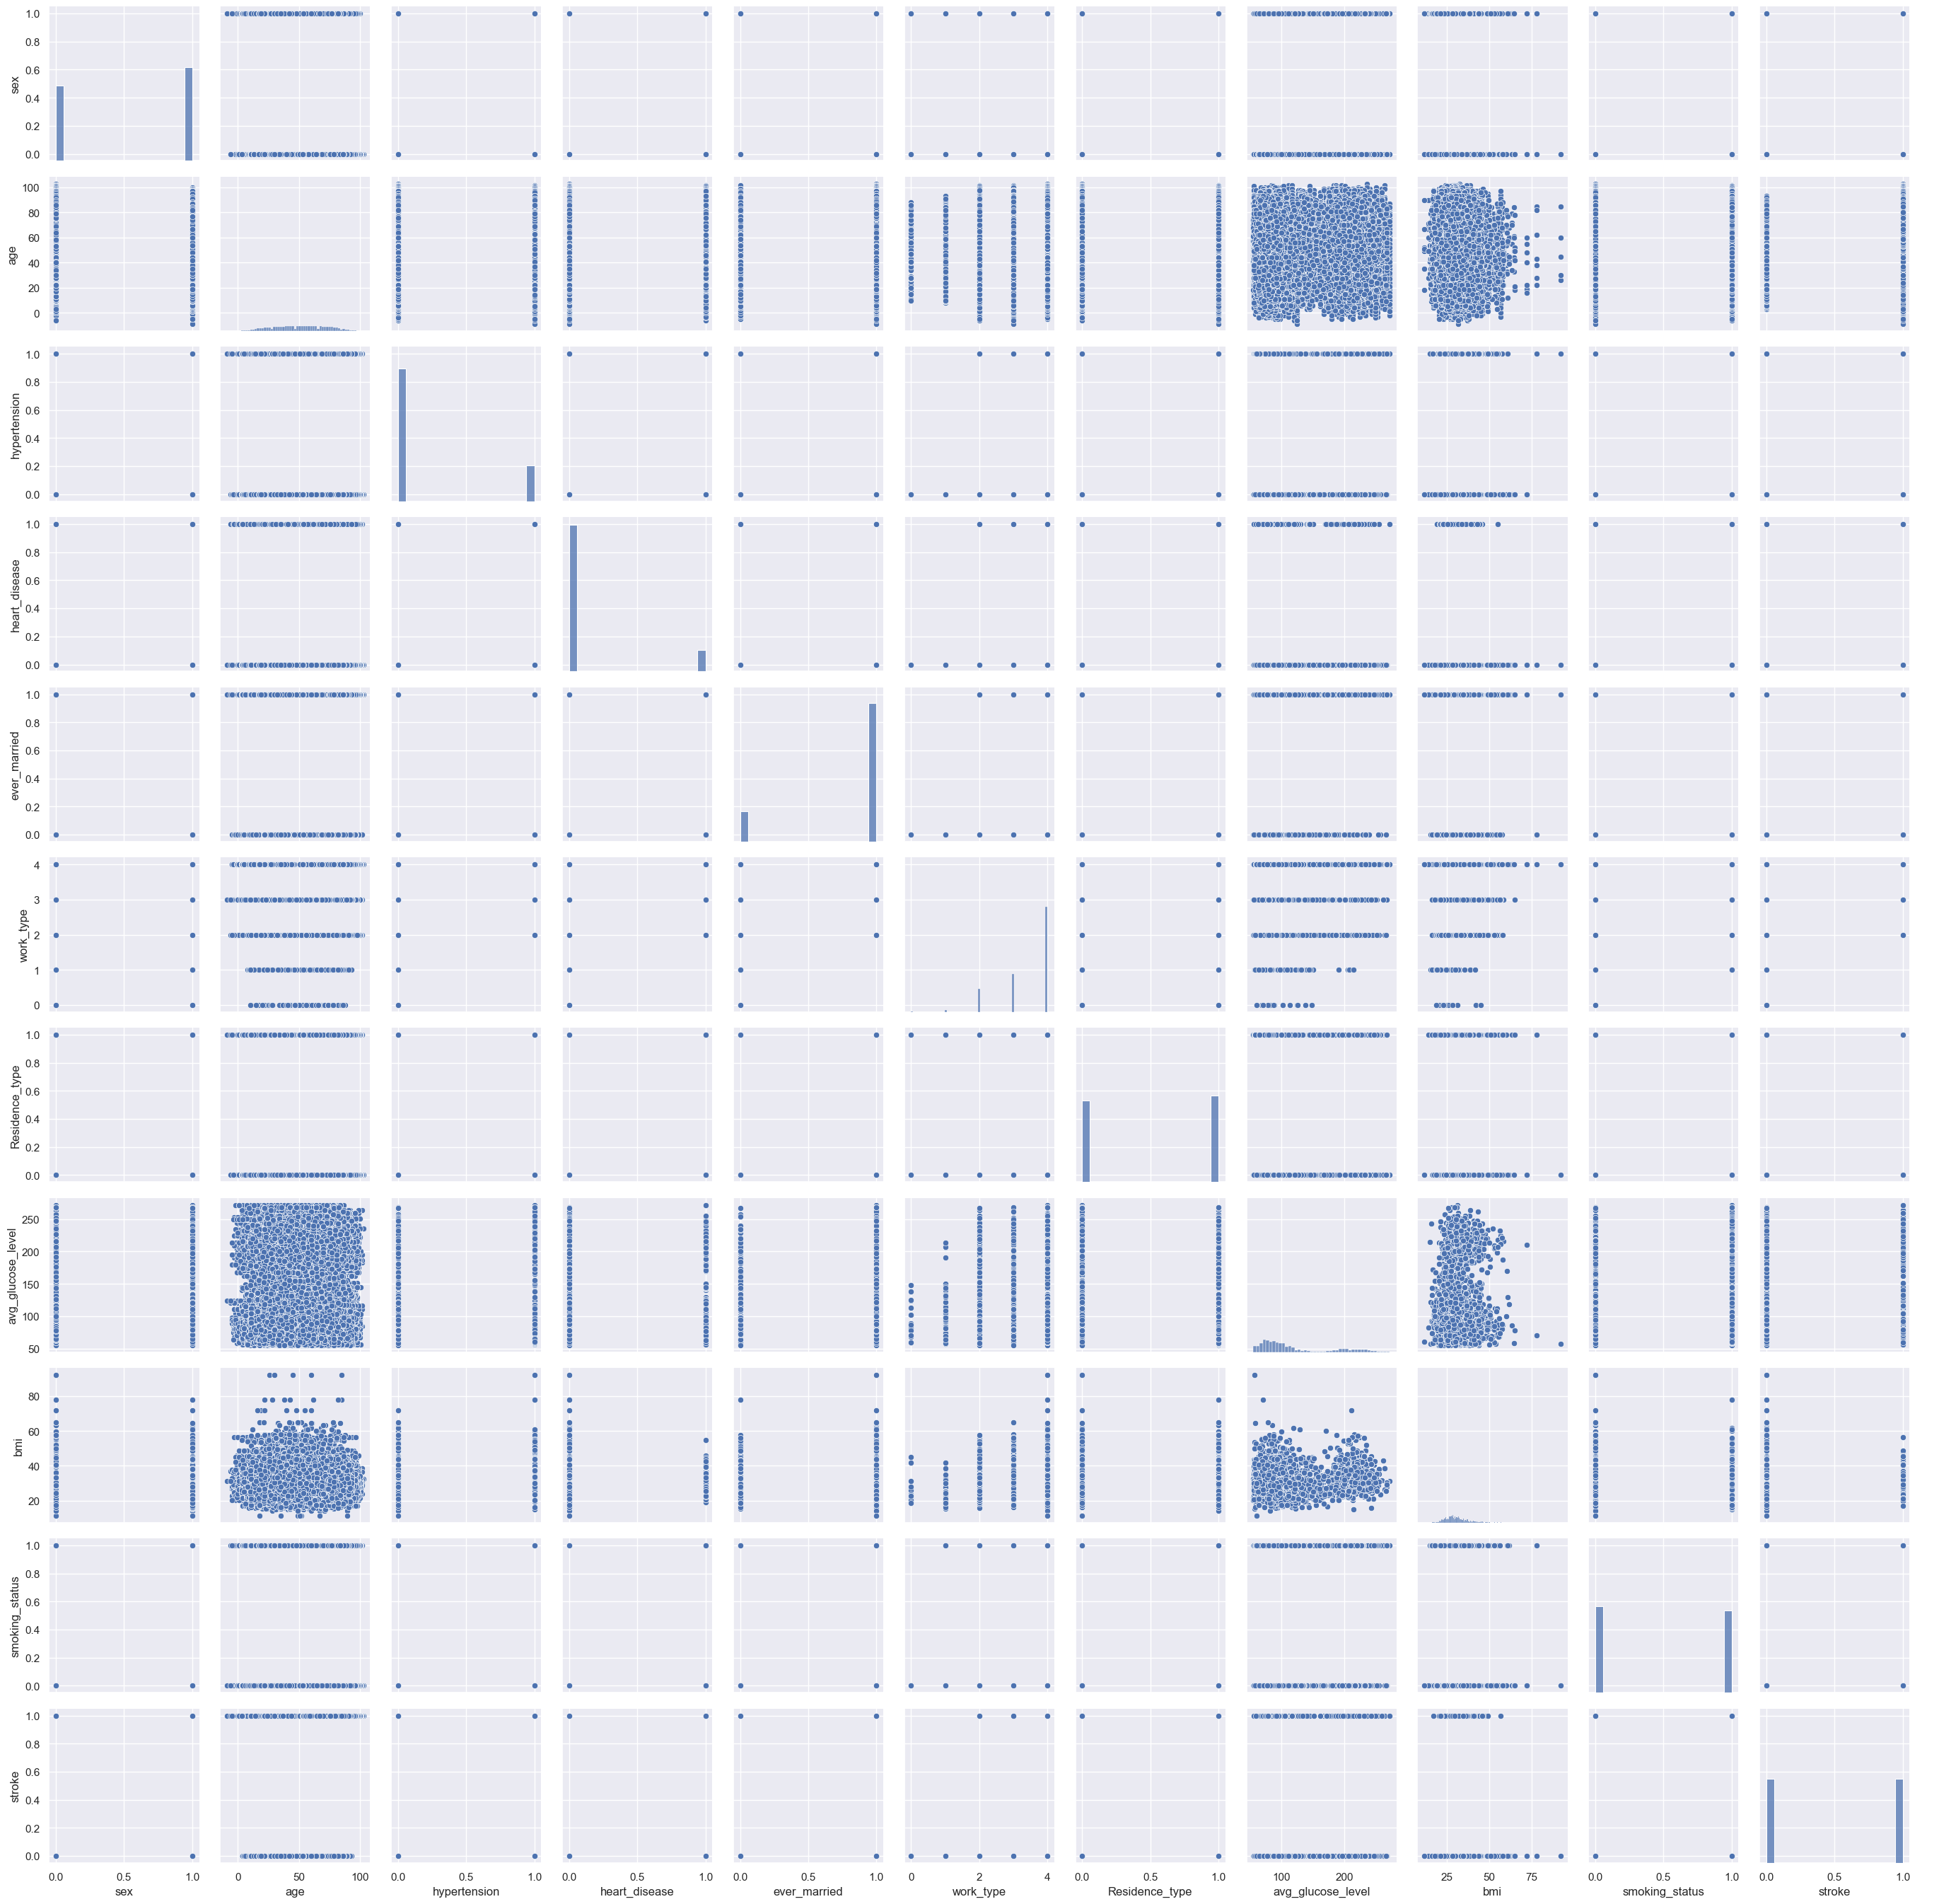

In [55]:
g=sns.PairGrid(df) #this is just intitializing the plot
# we can optimize the plot as needed , gnearally we will be using pairplot

g.map_diag(sns.histplot)  # Diagonal plots
g.map_offdiag(sns.scatterplot)  # Off-diagonal plots
g.add_legend()
plt.show()

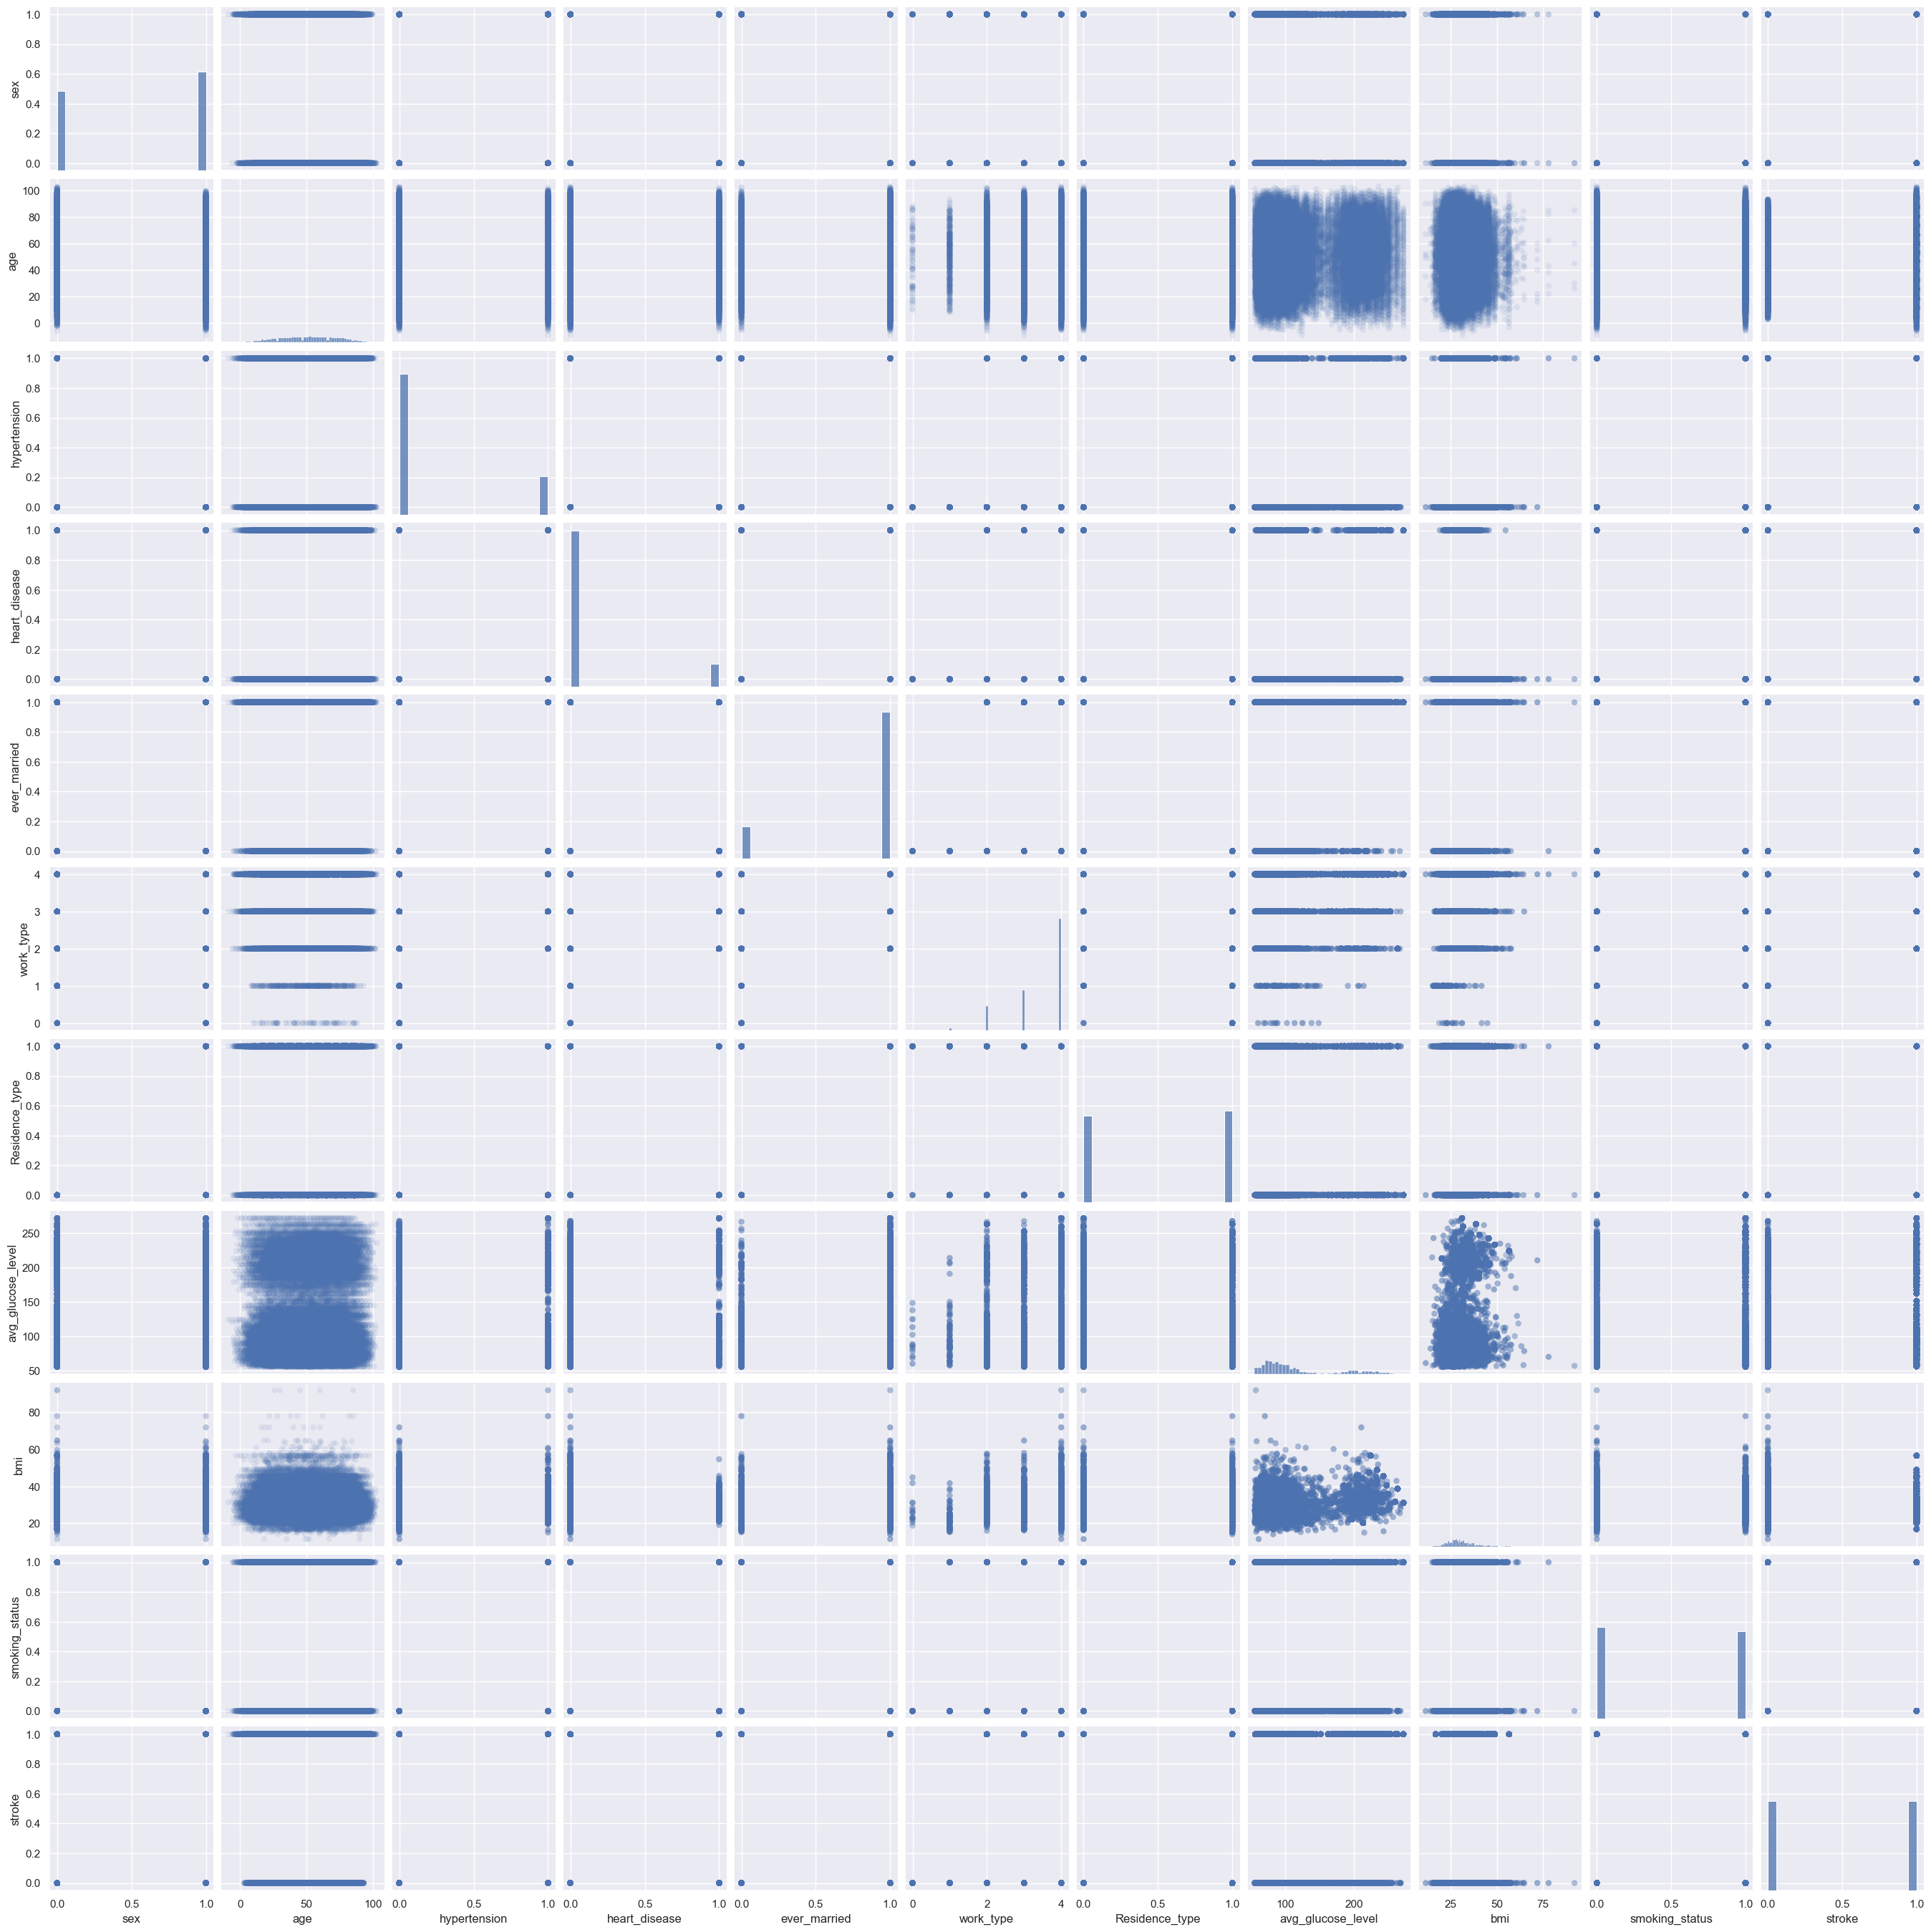

In [53]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

<Axes: >

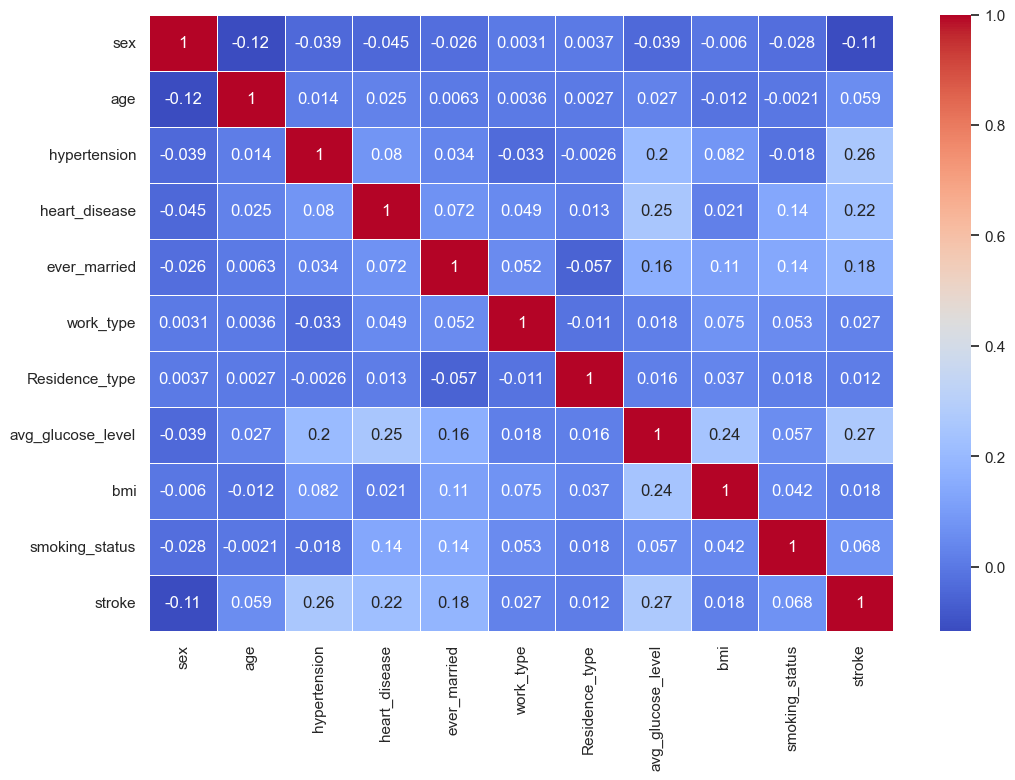

In [56]:
corr_matrix = df.corr()
#heat map
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

In [57]:
df["avg_glucose_level"]=np.log(df["avg_glucose_level"])

<Axes: >

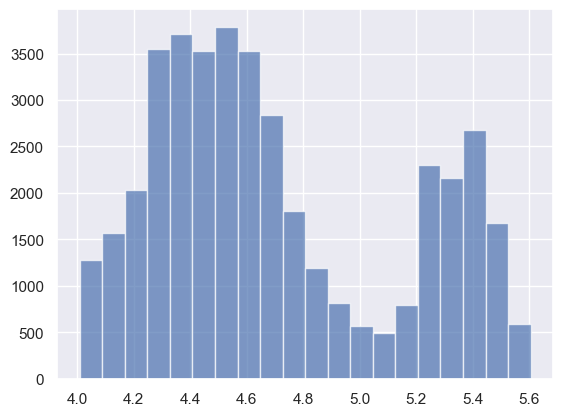

In [60]:
df["avg_glucose_level"].hist(bins=20,alpha=0.7)

In [61]:
df["avg_glucose_level"]=np.sqrt(df["avg_glucose_level"])

<Axes: >

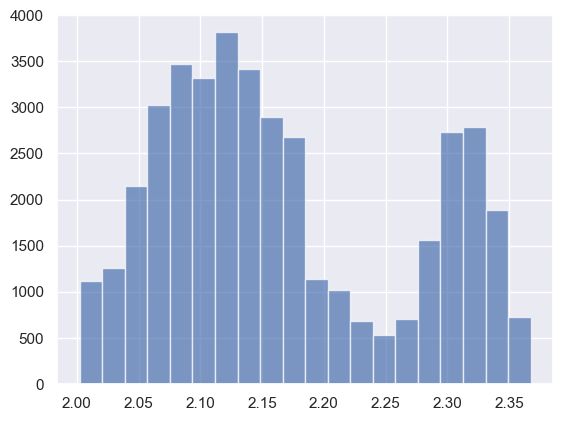

In [62]:
df["avg_glucose_level"].hist(bins=20,alpha=0.7)

In [80]:

x=pd.DataFrame(df.drop(["stroke"],axis=1))
x.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63.0,0,1,1,4,1,2.330744,36.6,1
1,1.0,42.0,0,1,1,4,0,2.159325,32.5,0
2,0.0,61.0,0,0,1,4,1,2.267820,34.4,1
3,1.0,41.0,1,0,1,3,0,2.271507,24.0,0
4,1.0,85.0,0,0,1,4,1,2.286236,29.0,1


In [86]:
y=pd.DataFrame(df["stroke"])
y.head()
y.value_counts(normalize=True)

stroke
1         0.500159
0         0.499841
Name: proportion, dtype: float64

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(x, y))


for train_idx, test_idx in strat_shuf_split.split(x, y):
    X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

array([[<Axes: title={'center': 'stroke'}>]], dtype=object)

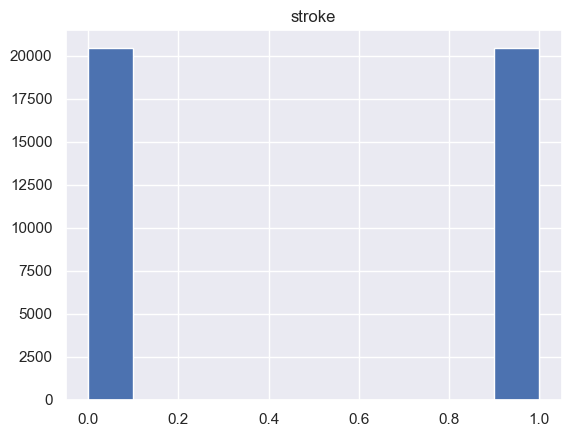

In [88]:
y.hist()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [91]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for logistic regression
logreg_param_grid = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # 'liblinear' supports 'l1' penalty
}

# Set up GridSearchCV for logistic regression
logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the logistic regression model
logreg_grid_search.fit(X_train, y_train)

# Get the best parameters and score for logistic regression
print(f"Logistic Regression - Best parameters: {logreg_grid_search.best_params_}")
print(f"Logistic Regression - Best cross-validation score: {logreg_grid_search.best_score_}")

# Evaluate the logistic regression model on the test set
best_logreg_model = logreg_grid_search.best_estimator_
logreg_test_score = best_logreg_model.score(X_test, y_test)
print(f"Logistic Regression - Test set score: {logreg_test_score}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression - Best parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression - Best cross-validation score: 0.6810084847278376
Logistic Regression - Test set score: 0.6866291860180885


C:\Users\munna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline that includes standard scaling and k-NN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for k-NN
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV for k-NN
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the k-NN model
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and score for k-NN
print(f"K-NN - Best parameters: {knn_grid_search.best_params_}")
print(f"K-NN - Best cross-validation score: {knn_grid_search.best_score_}")

# Evaluate the k-NN model on the test set
best_knn_model = knn_grid_search.best_estimator_
knn_test_score = best_knn_model.score(X_test, y_test)
print(f"K-NN - Test set score: {knn_test_score}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\munna\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-NN - Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
K-NN - Best cross-validation score: 0.917929544416485
K-NN - Test set score: 0.9283793693473479


In [99]:
from sklearn.ensemble import RandomForestClassifier


# Create a pipeline that includes standard scaling and random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for Random Forest but often useful
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up GridSearchCV for Random Forest
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Random Forest model
grid_search.fit(X_train, y_train)

# Get the best parameters and score for Random Forest
print(f"Random Forest - Best parameters: {grid_search.best_params_}")
print(f"Random Forest - Best cross-validation score: {grid_search.best_score_}")

# Evaluate the Random Forest model on the test set
best_rf_model = grid_search.best_estimator_
rf_test_score = best_rf_model.score(X_test, y_test)
print(f"Random Forest - Test set score: {rf_test_score}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\munna\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Best parameters: {'rf__bootstrap': False, 'rf__max_depth': 30, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}
Random Forest - Best cross-validation score: 0.997206124685533
Random Forest - Test set score: 0.9986148455960238


In [123]:
results = {
    'Model': ['K-NN', 'Random Forest', 'Logistic Regression'],
    'Best Parameters': [
        {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'},
        {'rf__bootstrap': False, 'rf__max_depth': 30, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 300},
        {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
    ],
    'Best Cross-Validation Score': [0.917929544416485, 0.997206124685533, 0.6810084847278376],
    'Test Set Score': [0.9283793693473479, 0.9986148455960238, 0.6866291860180885]
}

results_df=pd.DataFrame(results)
results_df

,Model,Best Parameters,Best Cross-Validation Score,Test Set Score
0,K-NN,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.917930,0.928379
1,Random Forest,"{'rf__bootstrap': False, 'rf__max_depth': 30, ...",0.997206,0.998615
2,Logistic Regression,"{'logreg__C': 0.1, 'logreg__penalty': 'l1', 'l...",0.681008,0.686629
